https://drive.google.com/open?id=1vvvzrB3M5ge1RXDHMgCFUrlTyXyML15n

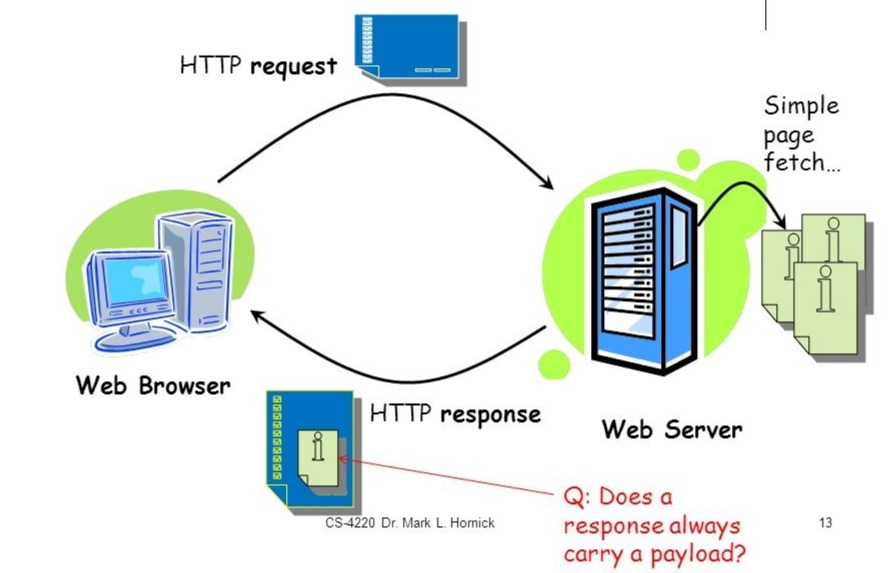

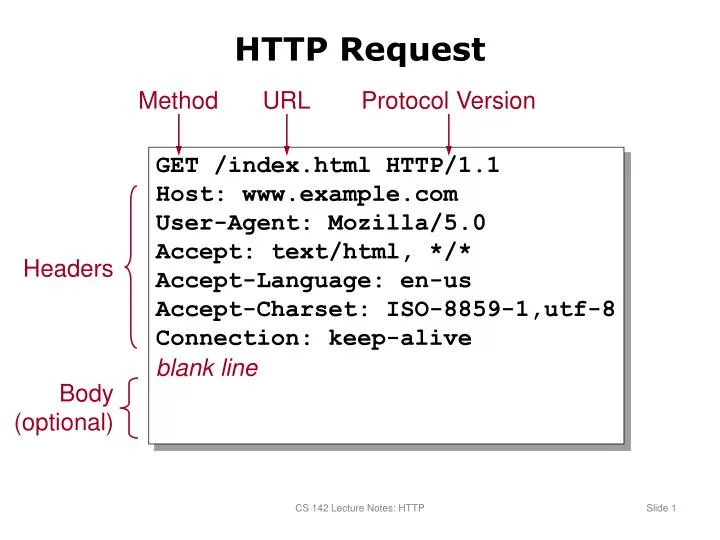

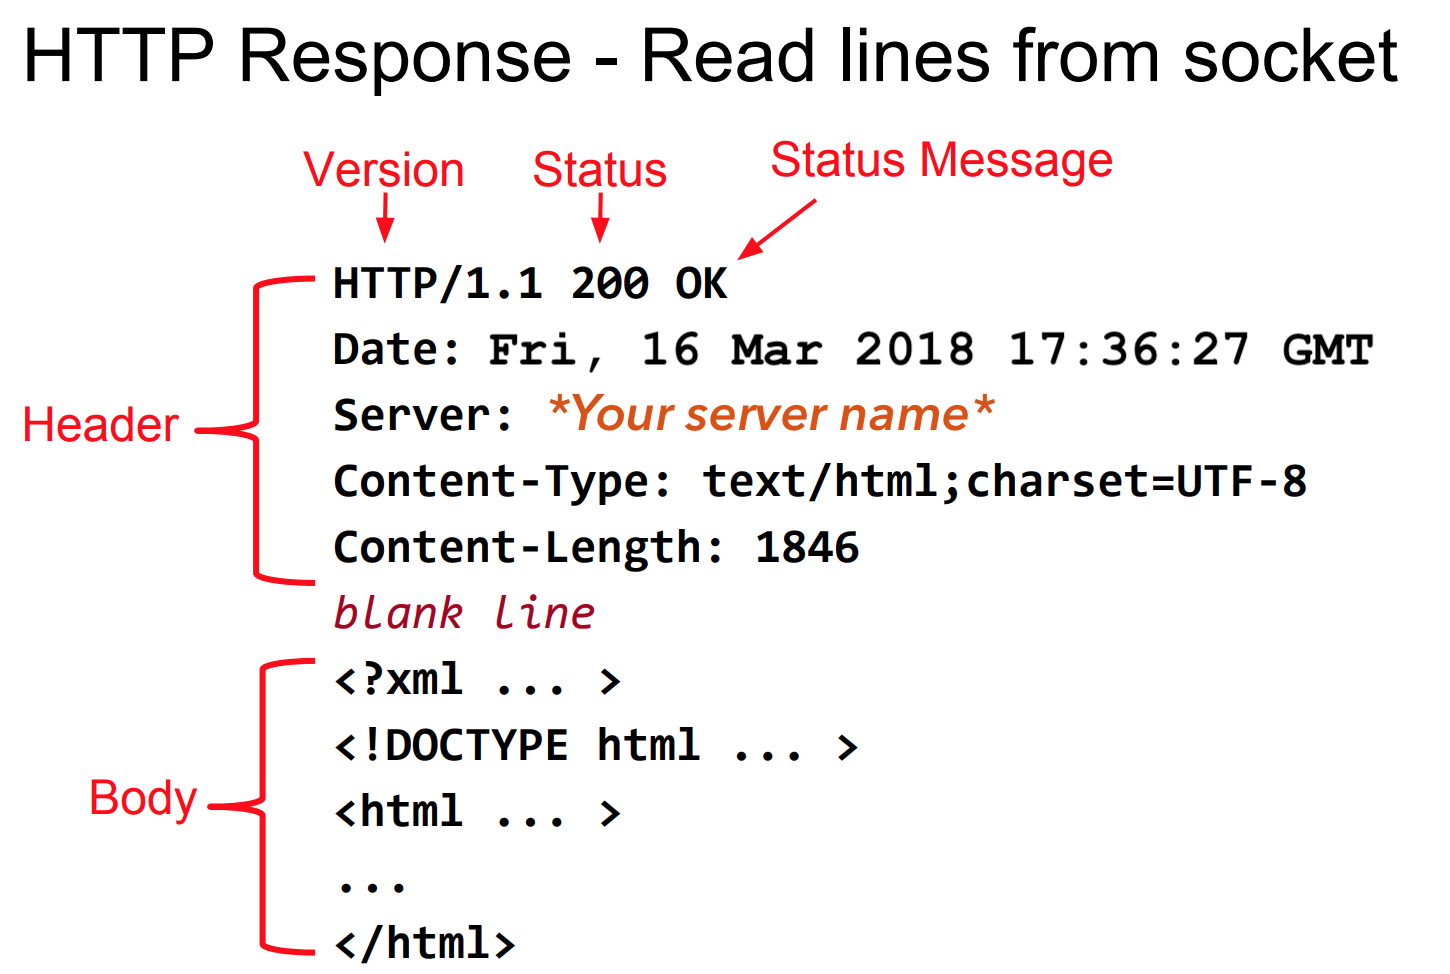

## Документация по библиотеке requests

https://pythonru.com/biblioteki/kratkoe-rukovodstvo-po-biblioteke-python-requests

In [1]:
import requests


In [2]:
r = requests.get('https://www.meteoservice.ru/weather/now/moskva.html')

In [4]:
# Что представляет собой переменная r?
type(r)

requests.models.Response

In [ ]:
print(r)

In [5]:
# Смотрим на загруженное содержимое в текстовом формате .text
r.text

'<!doctype html>\n<html class="no-js" lang="ru">\n<head>\n    <title>Погода в Москве сейчас - текущая фактическая погода в Москве по данным ближайшей метеостанции</title>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta http-equiv="Cache-Control" content="max-age=3600" />\n    <meta name="title" content="Погода в Москве сейчас - текущая фактическая погода в Москве по данным ближайшей метеостанции" />\n<meta name="language" content="ru" />\n<meta name="shortcut icon" content="/favicon.ico" />\n<meta name="description" content="Узнайте, какая погода в Москве сейчас (текущая фактическая погода): температура, влажность, ветер, давление, явления погоды в Москве" />\n<meta name="keywords" content="погода,в Москве,Москва,фактическая,текущая,осадки,температура,давление,влажность,ветер,скорость,направление" />\n\n    <link rel="preload" href="/css/app.css?=1588041610835" as="style">\n    <link rel="preload" href="/css/fonts.css" as="style">\n    <link rel="prelo

Сейчас текст хранится просто в строковой переменной. Далее мы можем превратить эту строку в словарь. Сделать это можно с помощью JSON-парсера python, либо воспользовавшись методом json, который уже встроен в объект ответа response.

## Прервёмся на изучение основ HTML

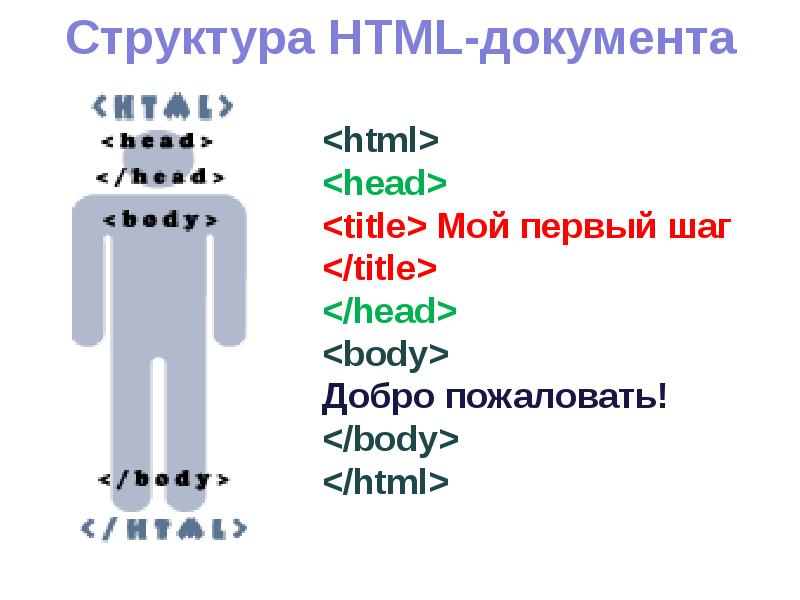

## Учимся делать парсинг сайтов

## Документация по библиотеке BeautifulSoup:
http://wiki.python.su/%D0%94%D0%BE%D0%BA%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D0%B8/BeautifulSoup

Для поиска данных на странице воспользуемся библиотекой BeautifulSoup. Она позволяет по названию тэгов и их атрибутов получать содержащийся в них текст.

1. Заголовок страницы.
2. Дату публикации.
3. Текст публикации.
4. Ссылки на странице.

In [6]:
from bs4 import BeautifulSoup

In [7]:
# Создаем объект библиотеки BeautifulSoup из текста, загруженного с погодного сайта
soup = BeautifulSoup(r.text, 'html.parser')

In [8]:
# Смотрим на содержимое объекта
soup

<!DOCTYPE html>

<html class="no-js" lang="ru">
<head>
<title>Погода в Москве сейчас - текущая фактическая погода в Москве по данным ближайшей метеостанции</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="max-age=3600" http-equiv="Cache-Control"/>
<meta content="Погода в Москве сейчас - текущая фактическая погода в Москве по данным ближайшей метеостанции" name="title"/>
<meta content="ru" name="language"/>
<meta content="/favicon.ico" name="shortcut icon"/>
<meta content="Узнайте, какая погода в Москве сейчас (текущая фактическая погода): температура, влажность, ветер, давление, явления погоды в Москве" name="description"/>
<meta content="погода,в Москве,Москва,фактическая,текущая,осадки,температура,давление,влажность,ветер,скорость,направление" name="keywords"/>
<link as="style" href="/css/app.css?=1588041610835" rel="preload"/>
<link as="style" href="/css/fonts.css" rel="preload"/>
<link as="script" href="/node_modules/jquery/dist/jquery.min

In [10]:
#Найдем title
soup.title.text


'Погода в Москве сейчас - текущая фактическая погода в Москве по данным ближайшей метеостанции'

In [11]:
#Найдем заголовок h1
soup.h1.text

'Погода в Москве сейчас'

Задание: получить информацию о текущей температуре комфорта

In [15]:
# Ищем первое появление на странице объекта, относящегося к классу 'value' метод find()
soup.find('h1')
soup.find(class_= 'text-center medium-text-left')

<h1 class="text-center medium-text-left">Погода в Москве сейчас</h1>

In [19]:
soup.find('span', class_ ='value')

<span class="value">+13°</span>

In [21]:
soup.find_all('span', class_ ='value')[1].text

'+12°'

In [26]:
#select_onsoup.select_one('value')
soup.select_one("span.value").text

'+13°'

In [28]:
#select
soup.select("span.value")[1].text

'+12°'

In [ ]:
# Извлекаем данные о температуре воздуха и переводим их в числовой формат


In [ ]:
# Извлекаем все данные о температуре воздуха

In [ ]:
# Пишем код, который будет извлекать со страницы температуру комфорта


Задание: Написать код, который в зависимости от значения температуры комфорта сообщает, тепло на улице, холодно или прохладно

In [33]:
t = int(soup.select("span.value")[1].text[1:-1])
znak = soup.select("span.value")[1].text[0]
if znak=='+':
    if t>15:
        print('жарко')
    else:
        print('тепло')
else:
    print('холодно')

    

тепло


Задание: Написать код, который запрашивает данные о температуре комфорта в Москве и любом другом городе (по желанию автора) и сравнивает их

In [37]:
r1 = requests.get('https://www.meteoservice.ru/weather/now/moskva.html')
r2 = requests.get('https://www.meteoservice.ru/weather/overview/shemyisheyka')
soup1 = BeautifulSoup(r1.text, 'html.parser')
soup2 = BeautifulSoup(r2.text, 'html.parser')
t1 = soup.select('span.value')[0].text
t2 = soup.select('span.value')[0].text
print(t1,t2)
if int(t1[1:-1]) < int(t2[1:-1]):
    print('Шемышейка')
elif int(t1[1:-1]) > int(t2[1:-1]):
    print('Москва')
else:
    print('Одинаково')


+13° +13°
Одинаково


## Работаем с таблицами

In [ ]:
#https://www.cbr-xml-daily.ru/daily_json.js


In [ ]:
#json()

In [38]:
import pandas as pd

In [39]:
tables = pd.read_html('https://www.finam.ru/quotes/stocks/russia/') 

In [40]:
tables

[    Unnamed: 0                Инструмент Посл. сделка, ₽ % Изм. цены  \
 0          NaN    СбербанкПотенциал:+37%        197.25 ₽       0.74%   
 1          NaN                    ЛУКОЙЛ        4826.5 ₽      -1.44%   
 2          NaN                ГАЗПРОМ ао           190 ₽         -2%   
 3          NaN                 ГМКНорНик         20478 ₽      -0.57%   
 4          NaN   Магнит аоПотенциал:+16%          3690 ₽       6.43%   
 5          NaN  АЛРОСА аоПотенциал:+111%          62.2 ₽      -2.66%   
 6          NaN                  Роснефть        335.65 ₽      -0.68%   
 7          NaN                  Аэрофлот         75.76 ₽      -0.97%   
 8          NaN                  СевСт-ао         889.6 ₽        1.6%   
 9          NaN     МосБиржаПотенциал:-8%        120.23 ₽      -1.05%   
 10         NaN  +МосЭнергоПотенциал:-12%         1.962 ₽       1.71%   
 11         NaN    AGRO-гдрПотенциал:+13%         626.4 ₽      -0.41%   
 12         NaN                  ENPL-гдр         5

In [42]:
# Изучаем содержимое объекта tables
df = tables[0]
df

,Unnamed: 0,Инструмент,"Посл. сделка, ₽",% Изм. цены,Открытие,Макс.,Мин.,Закрытие,"Объем, шт.",Время обн.
0,NaN,СбербанкПотенциал:+37%,197.25 ₽,0.74%,196.510,199.7000,195.4600,195.8000,87 198 650,30.04 18:49
1,NaN,ЛУКОЙЛ,4826.5 ₽,-1.44%,4940.000,5040.0000,4816.5000,4897.0000,3 034 509,30.04 18:49
2,NaN,ГАЗПРОМ ао,190 ₽,-2%,195.440,196.2000,189.6200,193.8700,72 119 050,30.04 18:49
3,NaN,ГМКНорНик,20478 ₽,-0.57%,20790.000,20876.0000,20306.0000,20596.0000,227 644,30.04 18:49
4,NaN,Магнит аоПотенциал:+16%,3690 ₽,6.43%,3476.000,3705.0000,3468.0000,3467.0000,1 485 267,30.04 18:49
5,NaN,АЛРОСА аоПотенциал:+111%,62.2 ₽,-2.66%,64.380,64.6200,61.2500,63.9000,34 628 220,30.04 18:49
6,NaN,Роснефть,335.65 ₽,-0.68%,343.250,346.4500,330.3000,337.9500,17 148 520,30.04 18:49
7,NaN,Аэрофлот,75.76 ₽,-0.97%,76.800,77.8600,74.4200,76.5000,19 867 740,30.04 18:49
8,NaN,СевСт-ао,889.6 ₽,1.6%,879.800,892.4000,870.4000,875.6000,1 425 775,30.04 18:47
9,NaN,МосБиржаПотенциал:-8%,120.23 ₽,-1.05%,121.700,123.9400,116.9700,121.5000,27 861 440,30.04 18:49


In [1]:
#Выведем на экран

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       0 non-null      float64
 1   Инструмент       30 non-null     object 
 2   Посл. сделка, ₽  30 non-null     object 
 3   % Изм. цены      30 non-null     object 
 4   Открытие         29 non-null     float64
 5   Макс.            29 non-null     float64
 6   Мин.             29 non-null     float64
 7   Закрытие         30 non-null     float64
 8   Объем, шт.       29 non-null     object 
 9   Время обн.       30 non-null     object 
dtypes: float64(5), object(5)
memory usage: 2.5+ KB


In [44]:
#Проанализируем изменение цены. min() max()
df[df["% Изм. цены"] == df["% Изм. цены"].max()]


,Unnamed: 0,Инструмент,"Посл. сделка, ₽",% Изм. цены,Открытие,Макс.,Мин.,Закрытие,"Объем, шт.",Время обн.
4,NaN,Магнит аоПотенциал:+16%,3690 ₽,6.43%,3476.0,3705.0,3468.0,3467.0,1 485 267,30.04 18:49


In [49]:
df[df['% Изм. цены'] == df['% Изм. цены'].max()][['Инструмент', '% Изм. цены']]

,Инструмент,% Изм. цены
4,Магнит аоПотенциал:+16%,6.43


https://docs.google.com/forms/d/e/1FAIpQLSfzvWcoW5-rBper-cWDIip4kY9EieHuJkPCciyRJ1cyRU_THQ/viewform

In [ ]:
df['column']=df.apply(lambda row: row.replace(''),axis=1)


In [47]:
df['% Изм. цены'] = df.apply(lambda row: row['% Изм. цены'].replace('%',''),axis=1)
df

,Unnamed: 0,Инструмент,"Посл. сделка, ₽",% Изм. цены,Открытие,Макс.,Мин.,Закрытие,"Объем, шт.",Время обн.
0,NaN,СбербанкПотенциал:+37%,197.25 ₽,0.74,196.510,199.7000,195.4600,195.8000,87 198 650,30.04 18:49
1,NaN,ЛУКОЙЛ,4826.5 ₽,-1.44,4940.000,5040.0000,4816.5000,4897.0000,3 034 509,30.04 18:49
2,NaN,ГАЗПРОМ ао,190 ₽,-2,195.440,196.2000,189.6200,193.8700,72 119 050,30.04 18:49
3,NaN,ГМКНорНик,20478 ₽,-0.57,20790.000,20876.0000,20306.0000,20596.0000,227 644,30.04 18:49
4,NaN,Магнит аоПотенциал:+16%,3690 ₽,6.43,3476.000,3705.0000,3468.0000,3467.0000,1 485 267,30.04 18:49
5,NaN,АЛРОСА аоПотенциал:+111%,62.2 ₽,-2.66,64.380,64.6200,61.2500,63.9000,34 628 220,30.04 18:49
6,NaN,Роснефть,335.65 ₽,-0.68,343.250,346.4500,330.3000,337.9500,17 148 520,30.04 18:49
7,NaN,Аэрофлот,75.76 ₽,-0.97,76.800,77.8600,74.4200,76.5000,19 867 740,30.04 18:49
8,NaN,СевСт-ао,889.6 ₽,1.6,879.800,892.4000,870.4000,875.6000,1 425 775,30.04 18:47
9,NaN,МосБиржаПотенциал:-8%,120.23 ₽,-1.05,121.700,123.9400,116.9700,121.5000,27 861 440,30.04 18:49


In [56]:
df['% Изм. цены']=df['% Изм. цены'].astype('float')

In [57]:
df['% Изм. цены'].min()

-2.91